In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from skimage.io import imread, imsave
from skimage.transform import resize
import seaborn as sns
from sklearn.model_selection import train_test_split

# Task 5

In [2]:
filename = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/training_classifications.csv"
data = pd.read_csv(filename)

In [3]:
data

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

How many images are in the training set? : 61578 

What is their dimension? 

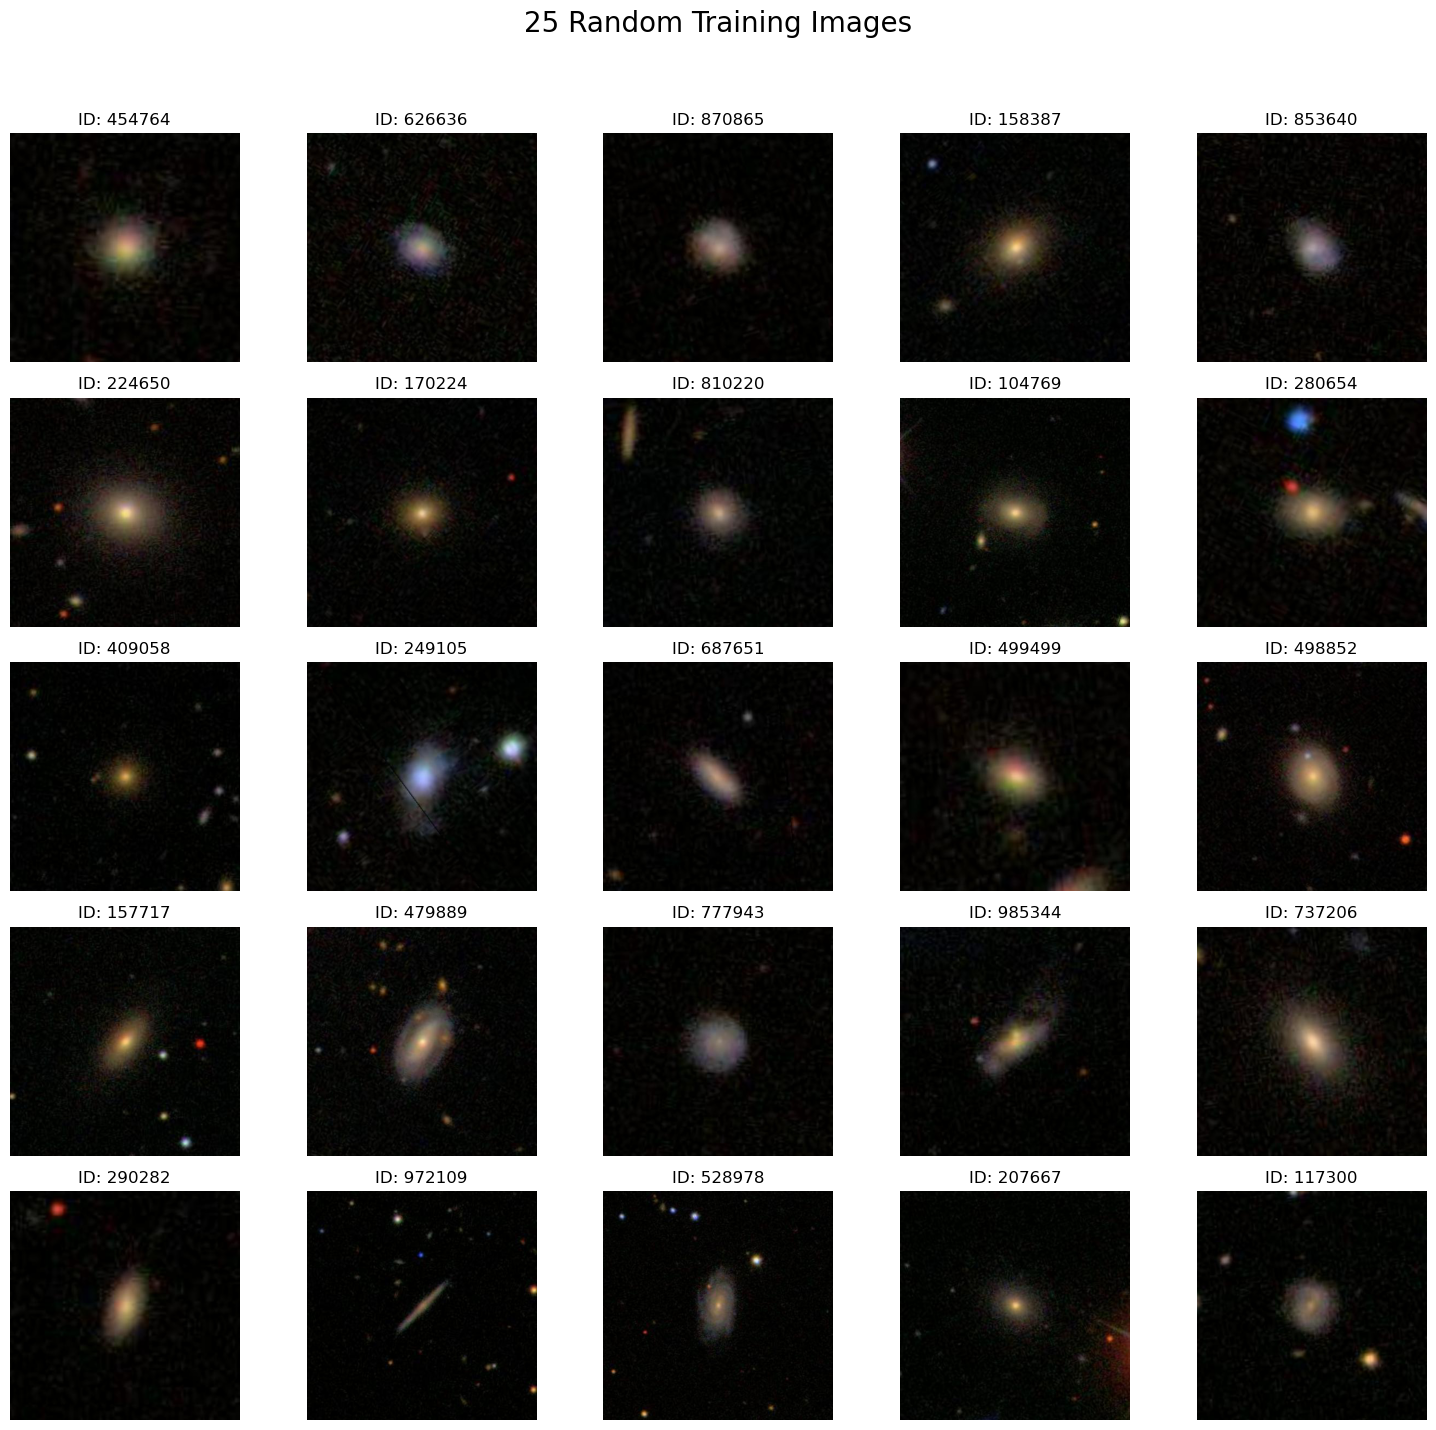

<Figure size 640x480 with 0 Axes>

In [4]:
image_directory = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/training_images" 

all_galaxy_ids = data['GalaxyID'].values

random_ids = np.random.choice(all_galaxy_ids, 25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('25 Random Training Images', fontsize=20)


for i, ax in enumerate(axes.flat):
    
    galaxy_id = random_ids[i]
    

    img_filename = f"{galaxy_id}.jpg"
    img_path = os.path.join(image_directory, img_filename)
    
    try:
       
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.set_title(f"ID: {galaxy_id}")
        
    except FileNotFoundError:
        ax.text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center')
        ax.set_title(f"ID: {galaxy_id} (Missing)")

    
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.figure('task5.png')
plt.show()

# Task 6

In [5]:
data.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

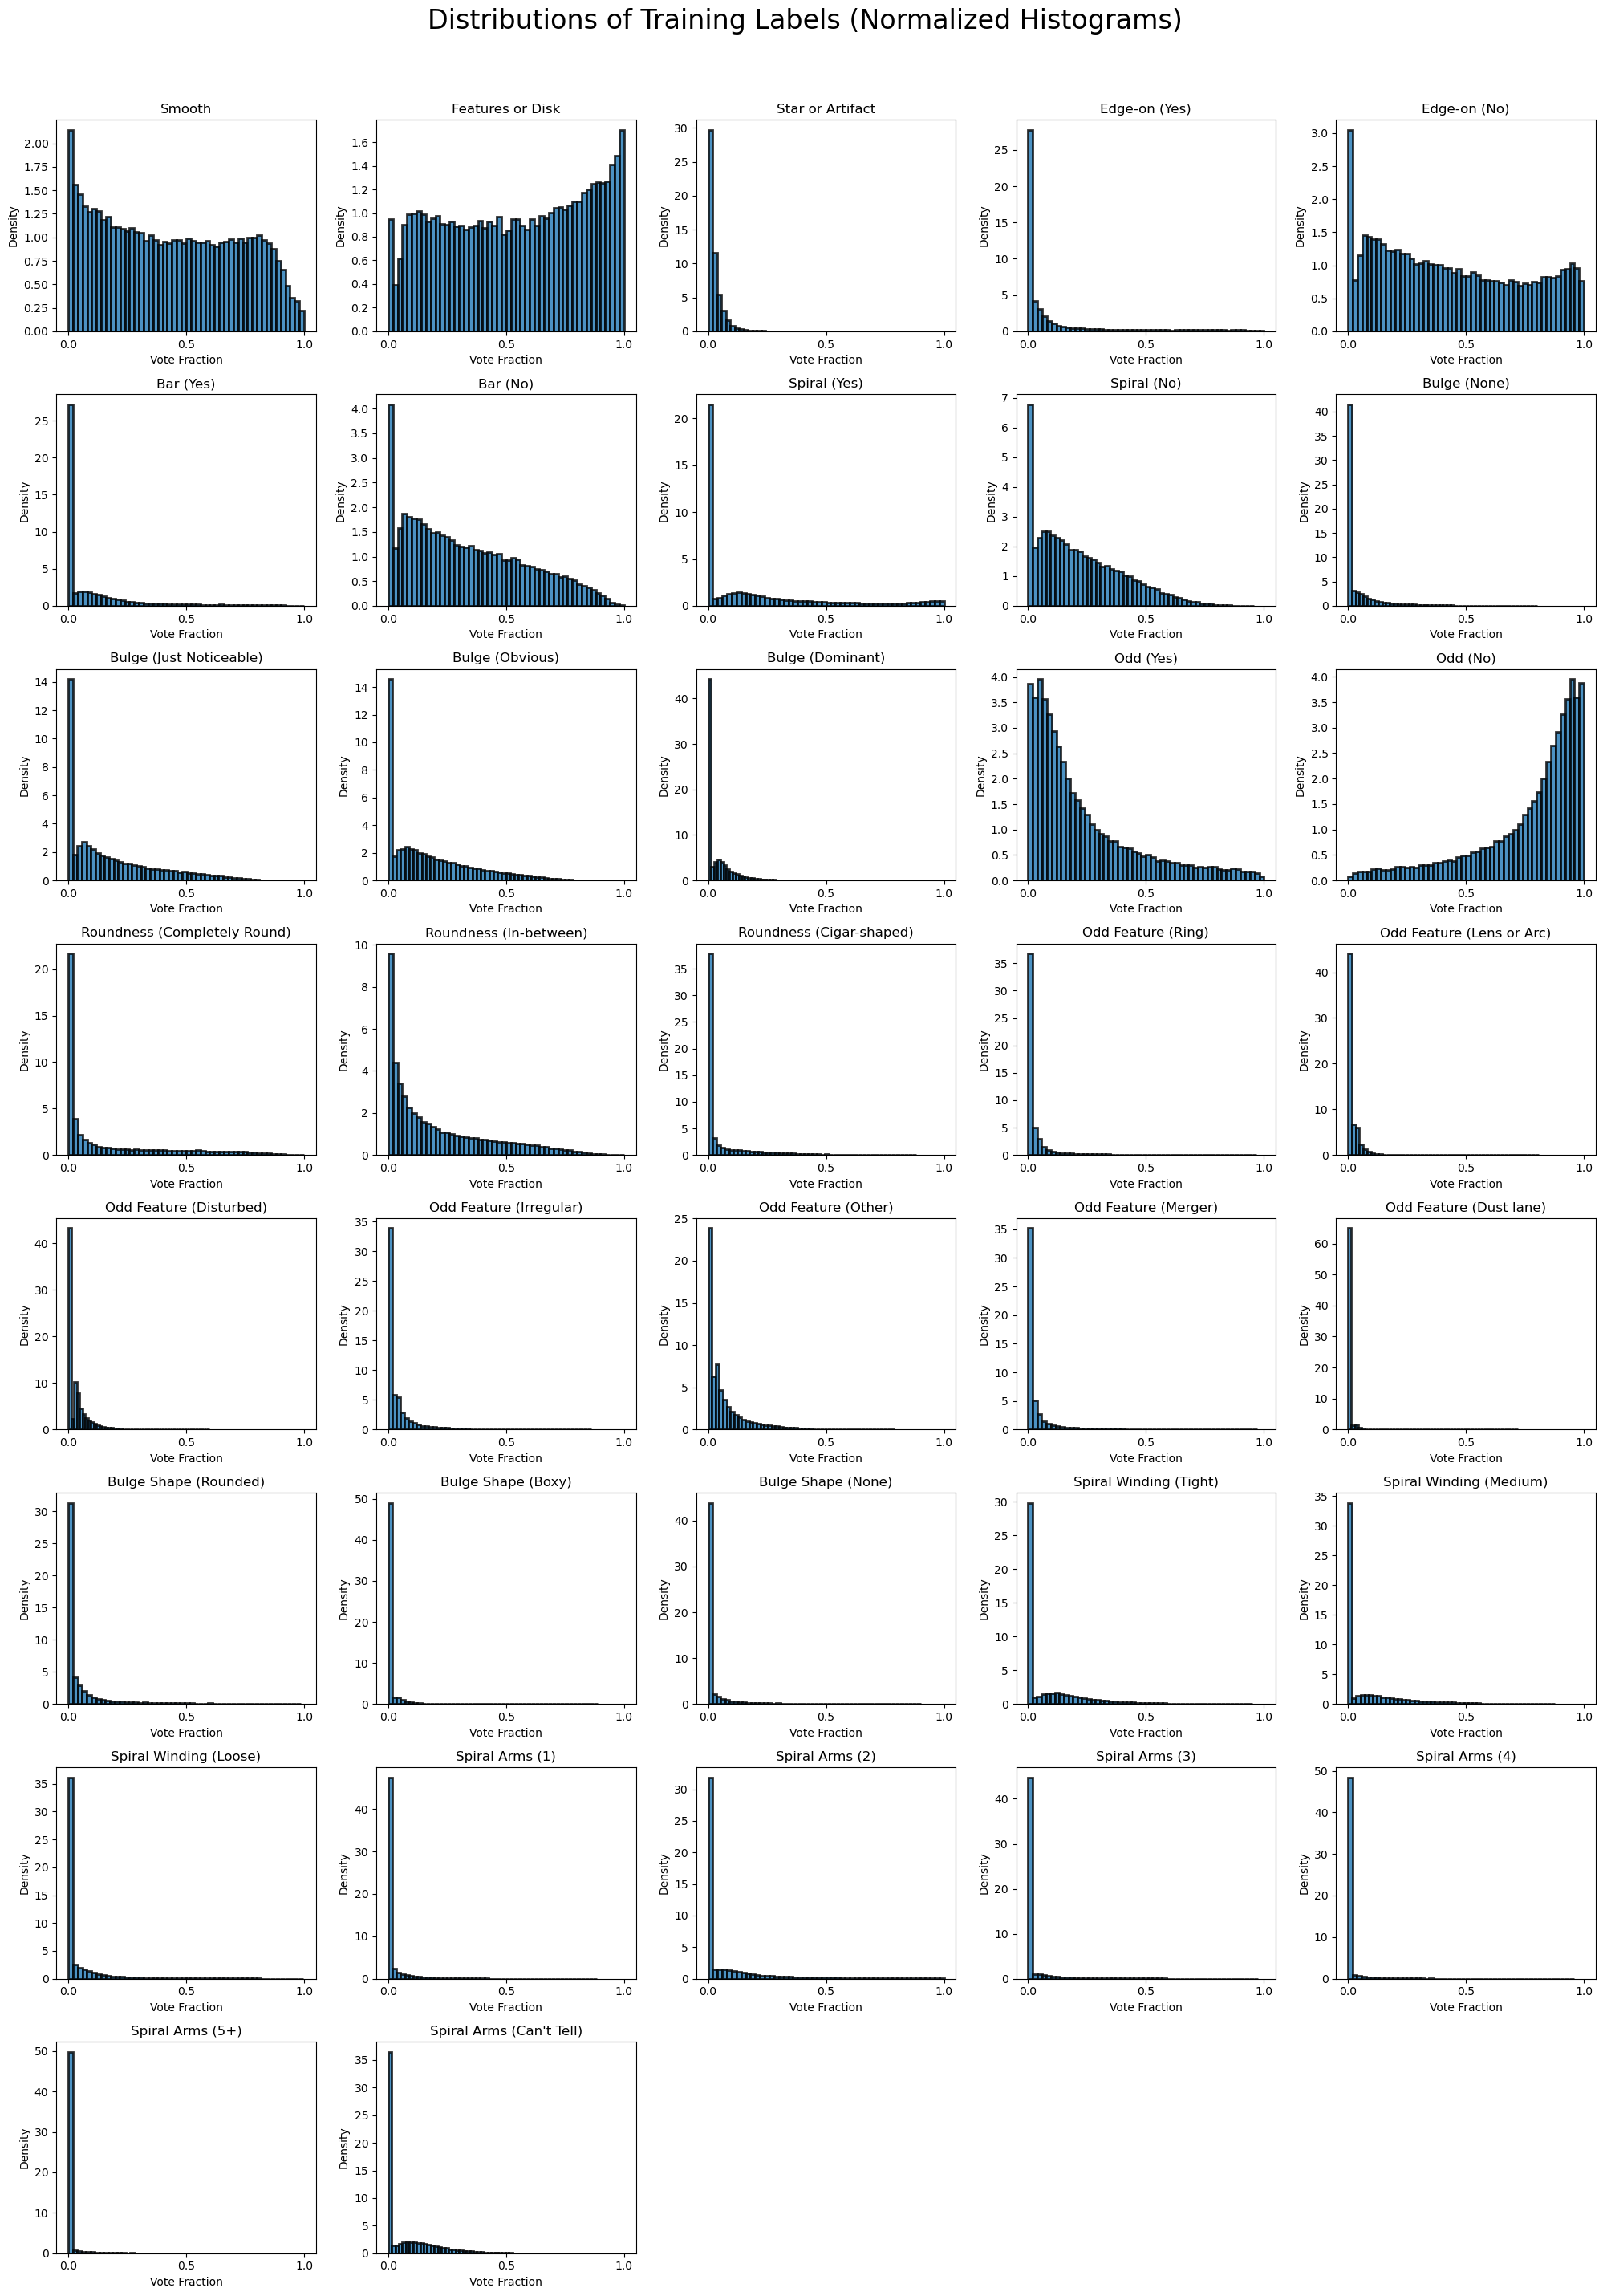

In [6]:
# This mapping is based on Table 2 of Willett et al. 2013 (the GZ2 decision tree)
COLUMN_MAPPING = {
    'Class1.1': 'Smooth',
    'Class1.2': 'Features or Disk',
    'Class1.3': 'Star or Artifact',
    
    'Class2.1': 'Edge-on (Yes)',
    'Class2.2': 'Edge-on (No)',
    
    'Class3.1': 'Bar (Yes)',
    'Class3.2': 'Bar (No)',
    
    'Class4.1': 'Spiral (Yes)',
    'Class4.2': 'Spiral (No)',
    
    'Class5.1': 'Bulge (None)',
    'Class5.2': 'Bulge (Just Noticeable)',
    'Class5.3': 'Bulge (Obvious)',
    'Class5.4': 'Bulge (Dominant)',
    
    'Class6.1': 'Odd (Yes)',
    'Class6.2': 'Odd (No)',
    
    'Class7.1': 'Roundness (Completely Round)',
    'Class7.2': 'Roundness (In-between)',
    'Class7.3': 'Roundness (Cigar-shaped)',
    
    'Class8.1': 'Odd Feature (Ring)',
    'Class8.2': 'Odd Feature (Lens or Arc)',
    'Class8.3': 'Odd Feature (Disturbed)',
    'Class8.4': 'Odd Feature (Irregular)',
    'Class8.5': 'Odd Feature (Other)',
    'Class8.6': 'Odd Feature (Merger)',
    'Class8.7': 'Odd Feature (Dust lane)',


    'Class9.1': 'Bulge Shape (Rounded)',
    'Class9.2': 'Bulge Shape (Boxy)',
    'Class9.3': 'Bulge Shape (None)',
    
    'Class10.1': 'Spiral Winding (Tight)',
    'Class10.2': 'Spiral Winding (Medium)',
    'Class10.3': 'Spiral Winding (Loose)',
    
    'Class11.1': 'Spiral Arms (1)',
    'Class11.2': 'Spiral Arms (2)',
    'Class11.3': 'Spiral Arms (3)',
    'Class11.4': 'Spiral Arms (4)',
    'Class11.5': 'Spiral Arms (5+)',
    'Class11.6': 'Spiral Arms (Can\'t Tell)',

}


label_columns = [col for col in data.columns if col.startswith('Class')]

fig, axes = plt.subplots(8, 5, figsize=(20, 28))
fig.suptitle('Distributions of Training Labels (Normalized Histograms)', fontsize=24, y=1.02)


axes = axes.flatten()

for i, col_name in enumerate(label_columns):
    ax = axes[i]
    
    
    title = COLUMN_MAPPING.get(col_name, col_name)
    
  
    ax.hist(data[col_name], bins=50, density=True, histtype='bar', alpha=0.8 ,lw=2,edgecolor='black')
    
    
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Vote Fraction', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    
   
    ax.set_xlim(-0.05, 1.05)
    ax.set_xticks([0, 0.5, 1])


for j in range(len(label_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig('task6.png', bbox_inches='tight')


### Analysis of the Distributions

* **Overall Observation:** Almost none of the distributions are "bell-shaped" (Gaussian). This is completely expected. These columns represent the *fraction of votes* from citizen scientists. A peak at 0.0 means high agreement a feature is **absent**. A peak at 1.0 means high agreement a feature is **present**. A peak in the middle means **ambiguity**.

* **Bimodal (U-Shaped) Distributions:**
    * **Examples:** `Smooth` (Class1.1), `Features or Disk` (Class1.2), `Edge-on (Yes)` (Class2.1), `Bar (Yes)` (Class3.1), and `Spiral (Yes)` (Class4.1).
    * **Comment:** These plots show two very strong peaks, one at 0.0 and one at 1.0, with a "U-shaped" valley in between.
    * **What it tells us:** This is the signature of a **high-consensus question**. For most galaxies, the volunteers were in strong agreement. A galaxy was either "clearly smooth" (vote near 1.0 for `Smooth`) or "clearly not smooth" (vote near 0.0 for `Smooth`). There were very few galaxies that users found ambiguous (i.e., vote fractions near 0.5). This indicates these top-level questions were well-defined and easy for people to answer.

* **Highly Skewed (Rare Feature) Distributions:**
    * **Examples:** `Star or Artifact` (Class1.3), `Odd (Yes)` (Class6.1), `Spiral Arms (1)` (Class10.1), and all of the `Odd Feature` (Class11.x) plots.
    * **Comment:** These plots are **extremely skewed to the right**, with a massive spike at 0.0 and a very long, thin tail. The y-axis (density) for the 0.0 bin is enormous.
    * **What it tells us:** This means the feature is **very rare**. For the vast majority of galaxies, almost all volunteers (100%) agreed the feature was *not* present, resulting in a vote fraction of 0.0. The "Odd Feature" plots (Ring, Merger, Dust Lane) are the best examples of this. This skew tells us that our dataset is "imbalanced" for these features, which is a key consideration for building a model.

* **Highly Skewed (Common Feature) Distributions:**
    * **Example:** `Odd (No)` (Class6.2).
    * **Comment:** This is the opposite of the "Rare Feature" plots. It is **extremely skewed to the left**, with a massive spike at 1.0.
    * **What it tells us:** This is just the inverse of `Odd (Yes)`. It confirms that the vast majority of galaxies were considered "Not Odd" by the volunteers, resulting in a vote fraction of 1.0.

* **"In-Between" (Less Bimodal) Distributions:**
    * **Examples:** `Roundness (In-between)` (Class7.2), `Bulge (Just Noticeable)` (Class5.2), `Spiral Winding (Medium)` (Class9.2).
    * **Comment:** These plots don't have the sharp "U-shape." While they still have a large peak at 0.0 (it's rare for a galaxy to be *perfectly* "in-between"), the rest of the votes are more spread out, with a smaller, wider peak between 0.2 and 0.8.
    * **What it tells us:** This indicates a **more subjective or ambiguous classification**. Questions like "How prominent is the bulge?" or "How tightly wound are the arms?" are not simple Yes/No questions. The "in-between" answers naturally have less consensus, leading to these more spread-out, less-skewed distributions. This tells us these features are harder to classify, both for humans and for a future machine learning model.

Used this paper https://arxiv.org/pdf/1308.3496 to get the lables from table 2

# Task 7

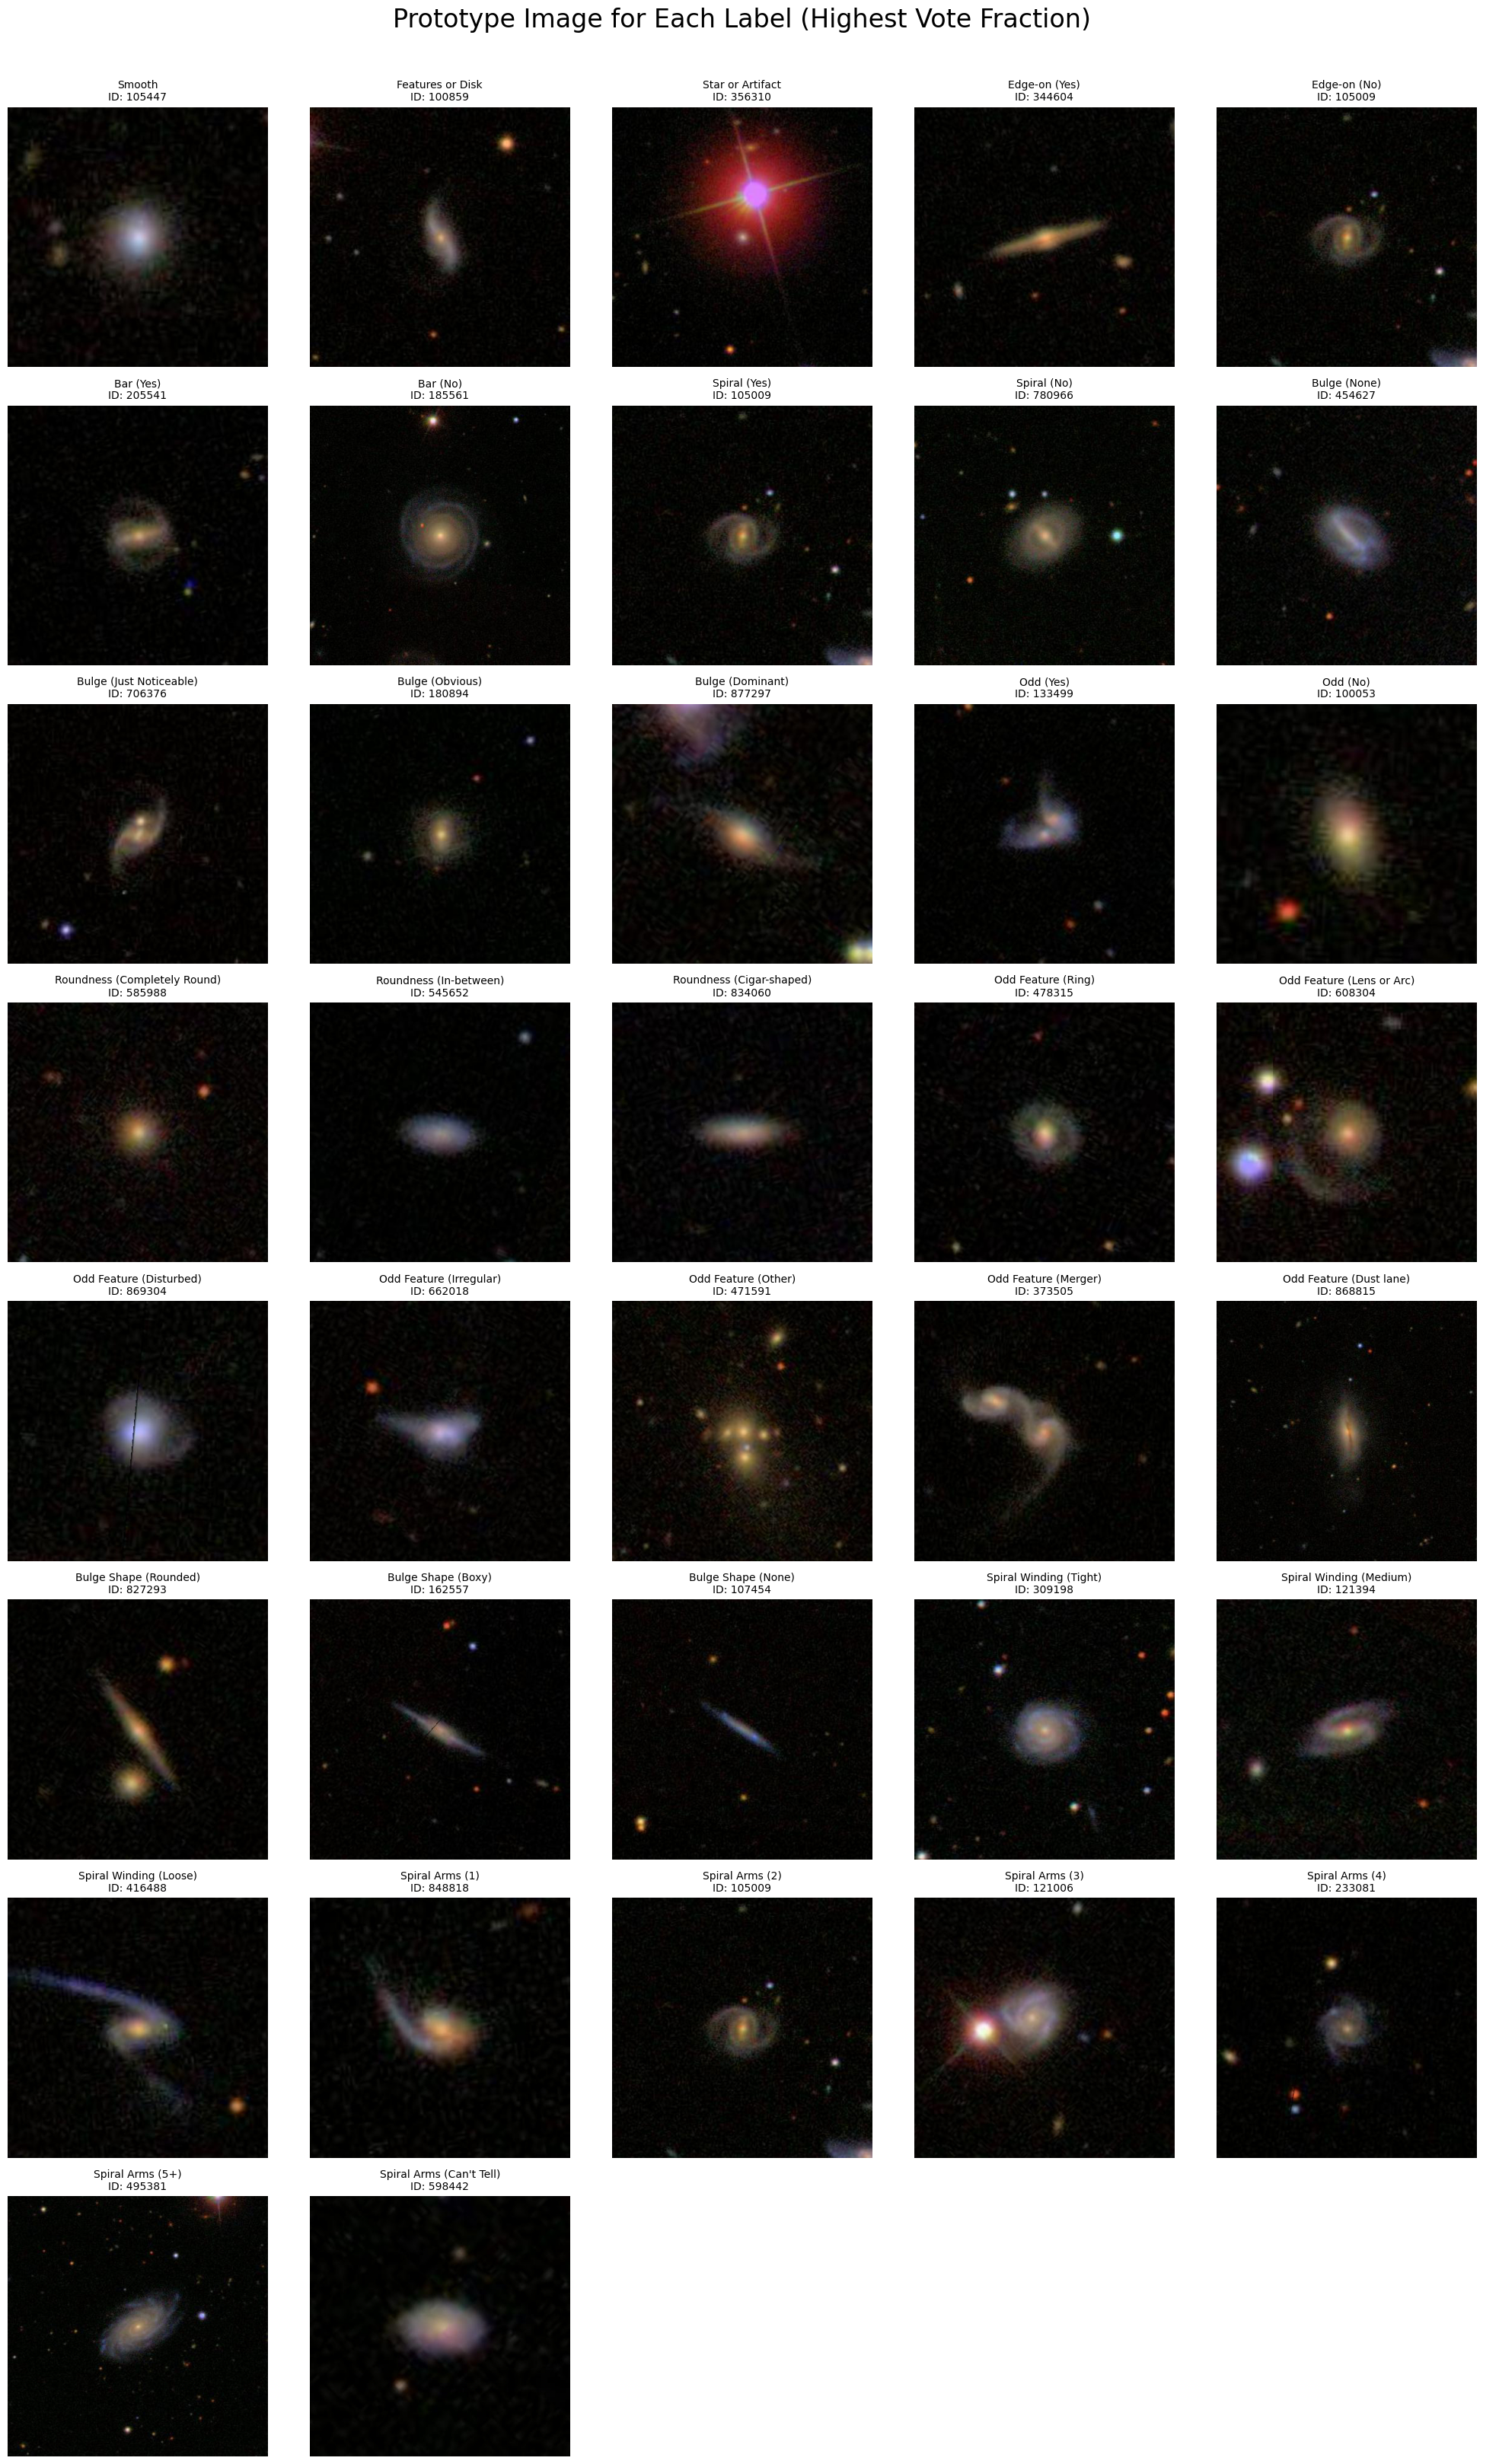

In [7]:
label_columns = [col for col in data.columns if col.startswith('Class')]


prototypes = []

for col_name in label_columns:
    # Find the row index (iloc) that has the maximum value for this column
    idx_max = data[col_name].idxmax()
    
    # Get the GalaxyID from that row
    galaxy_id = data.loc[idx_max, 'GalaxyID']
    
    # Get the descriptive title
    title = COLUMN_MAPPING.get(col_name, col_name)
    
    # Add to prototype list
    prototypes.append((title, str(galaxy_id)))


fig, axes = plt.subplots(8, 5, figsize=(20, 32))
fig.suptitle('Prototype Image for Each Label (Highest Vote Fraction)', fontsize=24, y=1.01)

axes = axes.flatten()

for i, (title, galaxy_id) in enumerate(prototypes):
    
    ax = axes[i]
    img_filename = f"{galaxy_id}.jpg"
    img_path = os.path.join(image_directory, img_filename)
    
    try:
 
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.set_title(f"{title}\nID: {galaxy_id}", fontsize=10)
        
    except FileNotFoundError:
        ax.text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center')
        ax.set_title(f"{title}\nID: {galaxy_id} (Missing)")

    ax.axis('off')

# Hide any unused axes (since we have 40 axes but 37 images)
for j in range(len(prototypes), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig('task7.png', bbox_inches='tight')
plt.show()

Based on these images, which labels do you think will be easy to classify (i.e., which are
visually obvious)?
Spirals will be easy to classify since they are visually obvious. 

Which are subtle and more likely to cause problems?


# Task 8

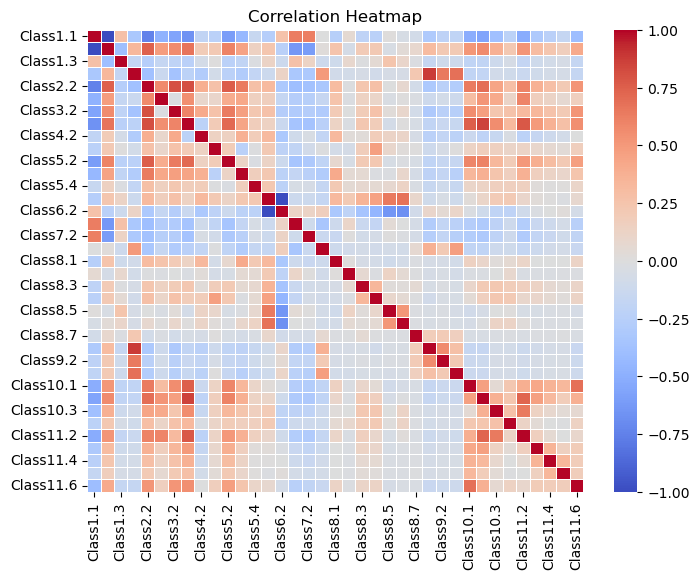

In [9]:
# Calculate the correlation matrix
data_matrix = data.drop('GalaxyID', axis=1)
corr_matrix = data_matrix.corr()

# Display the matrix (optional)
# print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('task8 correlation map.png')
plt.show()

## Questions to answer

How do the actual correlation coefficients compare to the value they “should” have? 

What does this tell us about the quality of the classifications in the training set?

Are some labels less reliable than others?

# Task 10

In [10]:
from skimage.io import imread, imsave

# --- Configuration from the document ---
image_directory = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/training_images"
new_image_directory = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/downsized_images" 

def downsize_and_save_image(img_filename, input_dir, output_dir, target_size=(64, 64)):
    input_path = os.path.join(input_dir, img_filename)
    output_path = os.path.join(output_dir, img_filename)

    # 1. Check if the output directory exists and create it
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created new directory: {output_dir}")

    try:
        # 2. Load the image
        img = imread(input_path)

        # Basic Preprocessing
        if img.ndim < 3:
            img = np.stack([img] * 3, axis=-1)

        # 3. Cropping 
        h, w, c = img.shape
        crop_size = 256
        h_start = (h - crop_size) // 2
        w_start = (w - crop_size) // 2
        
        if h_start < 0 or w_start < 0:
            cropped_img = img
        else:
            cropped_img = img[h_start:h_start + crop_size, w_start:w_start + crop_size, :]

        # 4. Resampling/Downscaling
        downsized_img = resize(cropped_img, target_size, 
                               anti_aliasing=True, preserve_range=True)
        
        # 5. Convert back to an integer type and scale for saving
        downsized_img_uint8 = (downsized_img / np.max(downsized_img) * 255).astype(np.uint8)

        # 6. Save the image to the new directory
        imsave(output_path, downsized_img_uint8)
        return True

    except FileNotFoundError:
        print(f"Error: Original image not found at {input_path}")
        return False
    except Exception as e:
        print(f"An error occurred for {img_filename}: {e}")
        return False

In [11]:
all_galaxy_ids = data["GalaxyID"].values
print(all_galaxy_ids)

[100008 100023 100053 ... 999958 999964 999967]


## Code to make new downsize images

In [12]:
# sample_galaxy_ids = [100008, 100023, 100053, 999948, 999950] 
# all_galaxy_ids = sample_galaxy_ids 
# print(f"Starting downsizing and saving {len(all_galaxy_ids)} images...")

# for galaxy_id in all_galaxy_ids:
#     img_filename = f"{galaxy_id}.jpg"
#     downsize_and_save_image(
#         img_filename=img_filename, 
#         input_dir=image_directory, 
#         output_dir=new_image_directory,
#         target_size=(64, 64)
#     )

# print(f"\nFinished. Check your new directory: {new_image_directory}")

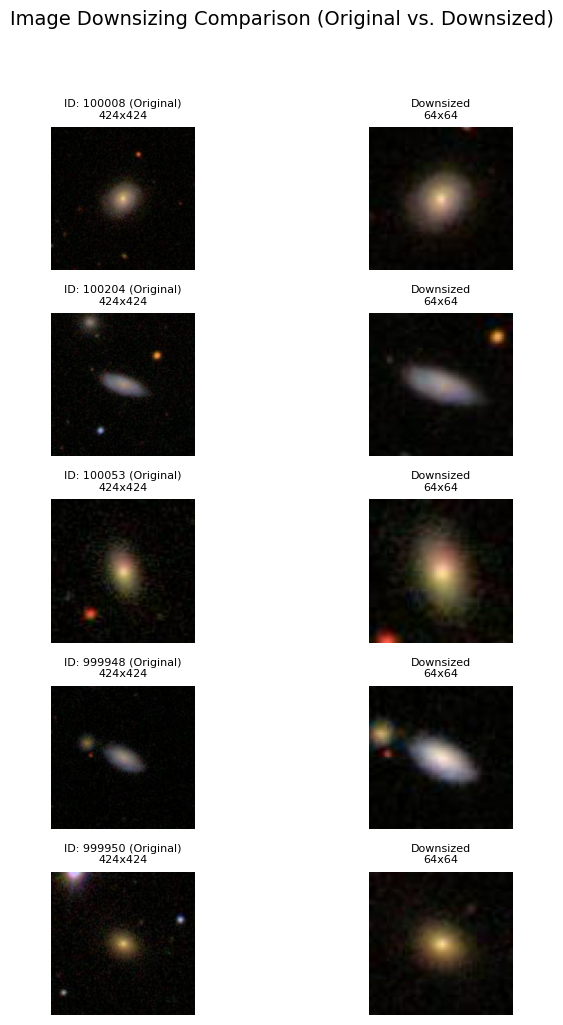

In [13]:
image_directory = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/training_images"

new_image_directory = "/Users/jsanchez/Downloads/AY128/course_materials_fa2025/labs/downsized_images"


sample_galaxy_ids = [100008, 100204, 100053, 999948, 999950] 

N_SAMPLES = len(sample_galaxy_ids)


fig, axes = plt.subplots(N_SAMPLES, 2, figsize=(8, 2 * N_SAMPLES))
fig.suptitle('Image Downsizing Comparison (Original vs. Downsized)', 
             fontsize=14, y=1.02)

for i, galaxy_id in enumerate(sample_galaxy_ids):
    img_filename = f"{galaxy_id}.jpg"
    original_path = os.path.join(image_directory, img_filename)
    downsized_path = os.path.join(new_image_directory, img_filename)

    try:
        
        original_img = imread(original_path)
    except FileNotFoundError:
        original_img = None
        print(f"Original image not found for ID: {galaxy_id}. Skipping.")
        continue 

    try:
        
        downsized_img = imread(downsized_path)
    except FileNotFoundError:
        downsized_img = None
        print(f"Downsized image not found for ID: {galaxy_id}. Run the saving function first!")
        
    # --- Plotting ---

    # Left Column: Original
    ax_orig = axes[i, 0]
    if original_img is not None:
        ax_orig.imshow(original_img)
        ax_orig.set_title(f"ID: {galaxy_id} (Original)\n{original_img.shape[0]}x{original_img.shape[1]}", fontsize=8)
    ax_orig.axis('off')

    # Right Column: Downsized
    ax_down = axes[i, 1]
    if downsized_img is not None:
        ax_down.imshow(downsized_img)
        ax_down.set_title(f"Downsized\n{downsized_img.shape[0]}x{downsized_img.shape[1]}", fontsize=8)
    else:
        ax_down.text(0.5, 0.5, 'Image Missing\n(Run Save Function)', ha='center', va='center')
    ax_down.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('task10.png', bbox_inches='tight')
plt.show()

# Task 11

# Task 12

In [14]:
import os
import torch
import numpy as np
import pandas as pd
from skimage.io import imread # Used for reading images
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# --- 1. Define the Custom Dataset Class (Must be top-level) ---

class GalaxyDataset(Dataset):
    """
    Custom PyTorch Dataset class to load galaxy images and vote fraction labels.
    """
    def __init__(self, df, img_dir, transform=None):
        # Reset index to ensure integer indexing works with .iloc
        self.df = df.reset_index(drop=True) 
        self.img_dir = img_dir
        self.transform = transform
        
        # Pre-extract GalaxyID + label vectors
        self.ids = self.df["GalaxyID"].values
        # Filter for all columns starting with "Class"
        self.label_columns = [col for col in df.columns if col.startswith("Class")]
        self.labels = self.df[self.label_columns].values.astype("float32")

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        galaxy_id = self.ids[idx]
        img_path = os.path.join(self.img_dir, f"{galaxy_id}.jpg")
        
        # Load the 64x64 downsized image
        img = imread(img_path) # (64,64,3) uint8
        
        # Normalize to [0,1]
        img = img.astype("float32") / 255 
        
        # Convert to PyTorch tensor and re-order dimensions: (H, W, C) → (C, H, W)
        img = torch.tensor(img).permute(2,0,1) 
        
        # Load the corresponding label vector
        label = torch.tensor(self.labels[idx])

        if self.transform:
            img = self.transform(img)
            
        return img, label

# --- 2. Load Data and Define Directories ---

filename = "training_classifications.csv" 
new_image_directory = "downsized_images" 

# Load the main data frame
try:
    data = pd.read_csv(filename)
except FileNotFoundError:
    print("ERROR: CSV file not found. Please check the 'filename' path.")
    raise

# --- 3. Split the Data into Training and Validation Sets (Task 12) ---

all_indices = data.index
train_indices, val_indices = train_test_split(
    all_indices,
    test_size=0.2,      # 20% for validation
    random_state=42,    
    shuffle=True        
)

train_df = data.loc[train_indices]
val_df = data.loc[val_indices]

print(f"Data split: Training ({len(train_df)}), Validation ({len(val_df)})")


# --- 4. Create Dataset and DataLoader instances (Task 11) ---

# Create the separate Dataset instances
train_dataset = GalaxyDataset(df=train_df, img_dir=new_image_directory)
val_dataset = GalaxyDataset(df=val_df, img_dir=new_image_directory)

# Create the DataLoader instances
# Use a smaller num_workers (e.g., 0 or 1) if the error persists.
# num_workers=4 is recommended for performance on Datahub.
train_loader = DataLoader(
    train_dataset,
    batch_size=128, 
    shuffle=True,
    num_workers=0, # parallel disk loading
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=128, 
    shuffle=False, # No need to shuffle validation data
    num_workers=0, 
    pin_memory=True
)

Data split: Training (49262), Validation (12316)


Successfully loaded 61578 objects from the CSV.

Training set size: 49262 objects (80%)
Validation set size: 12316 objects (20%)


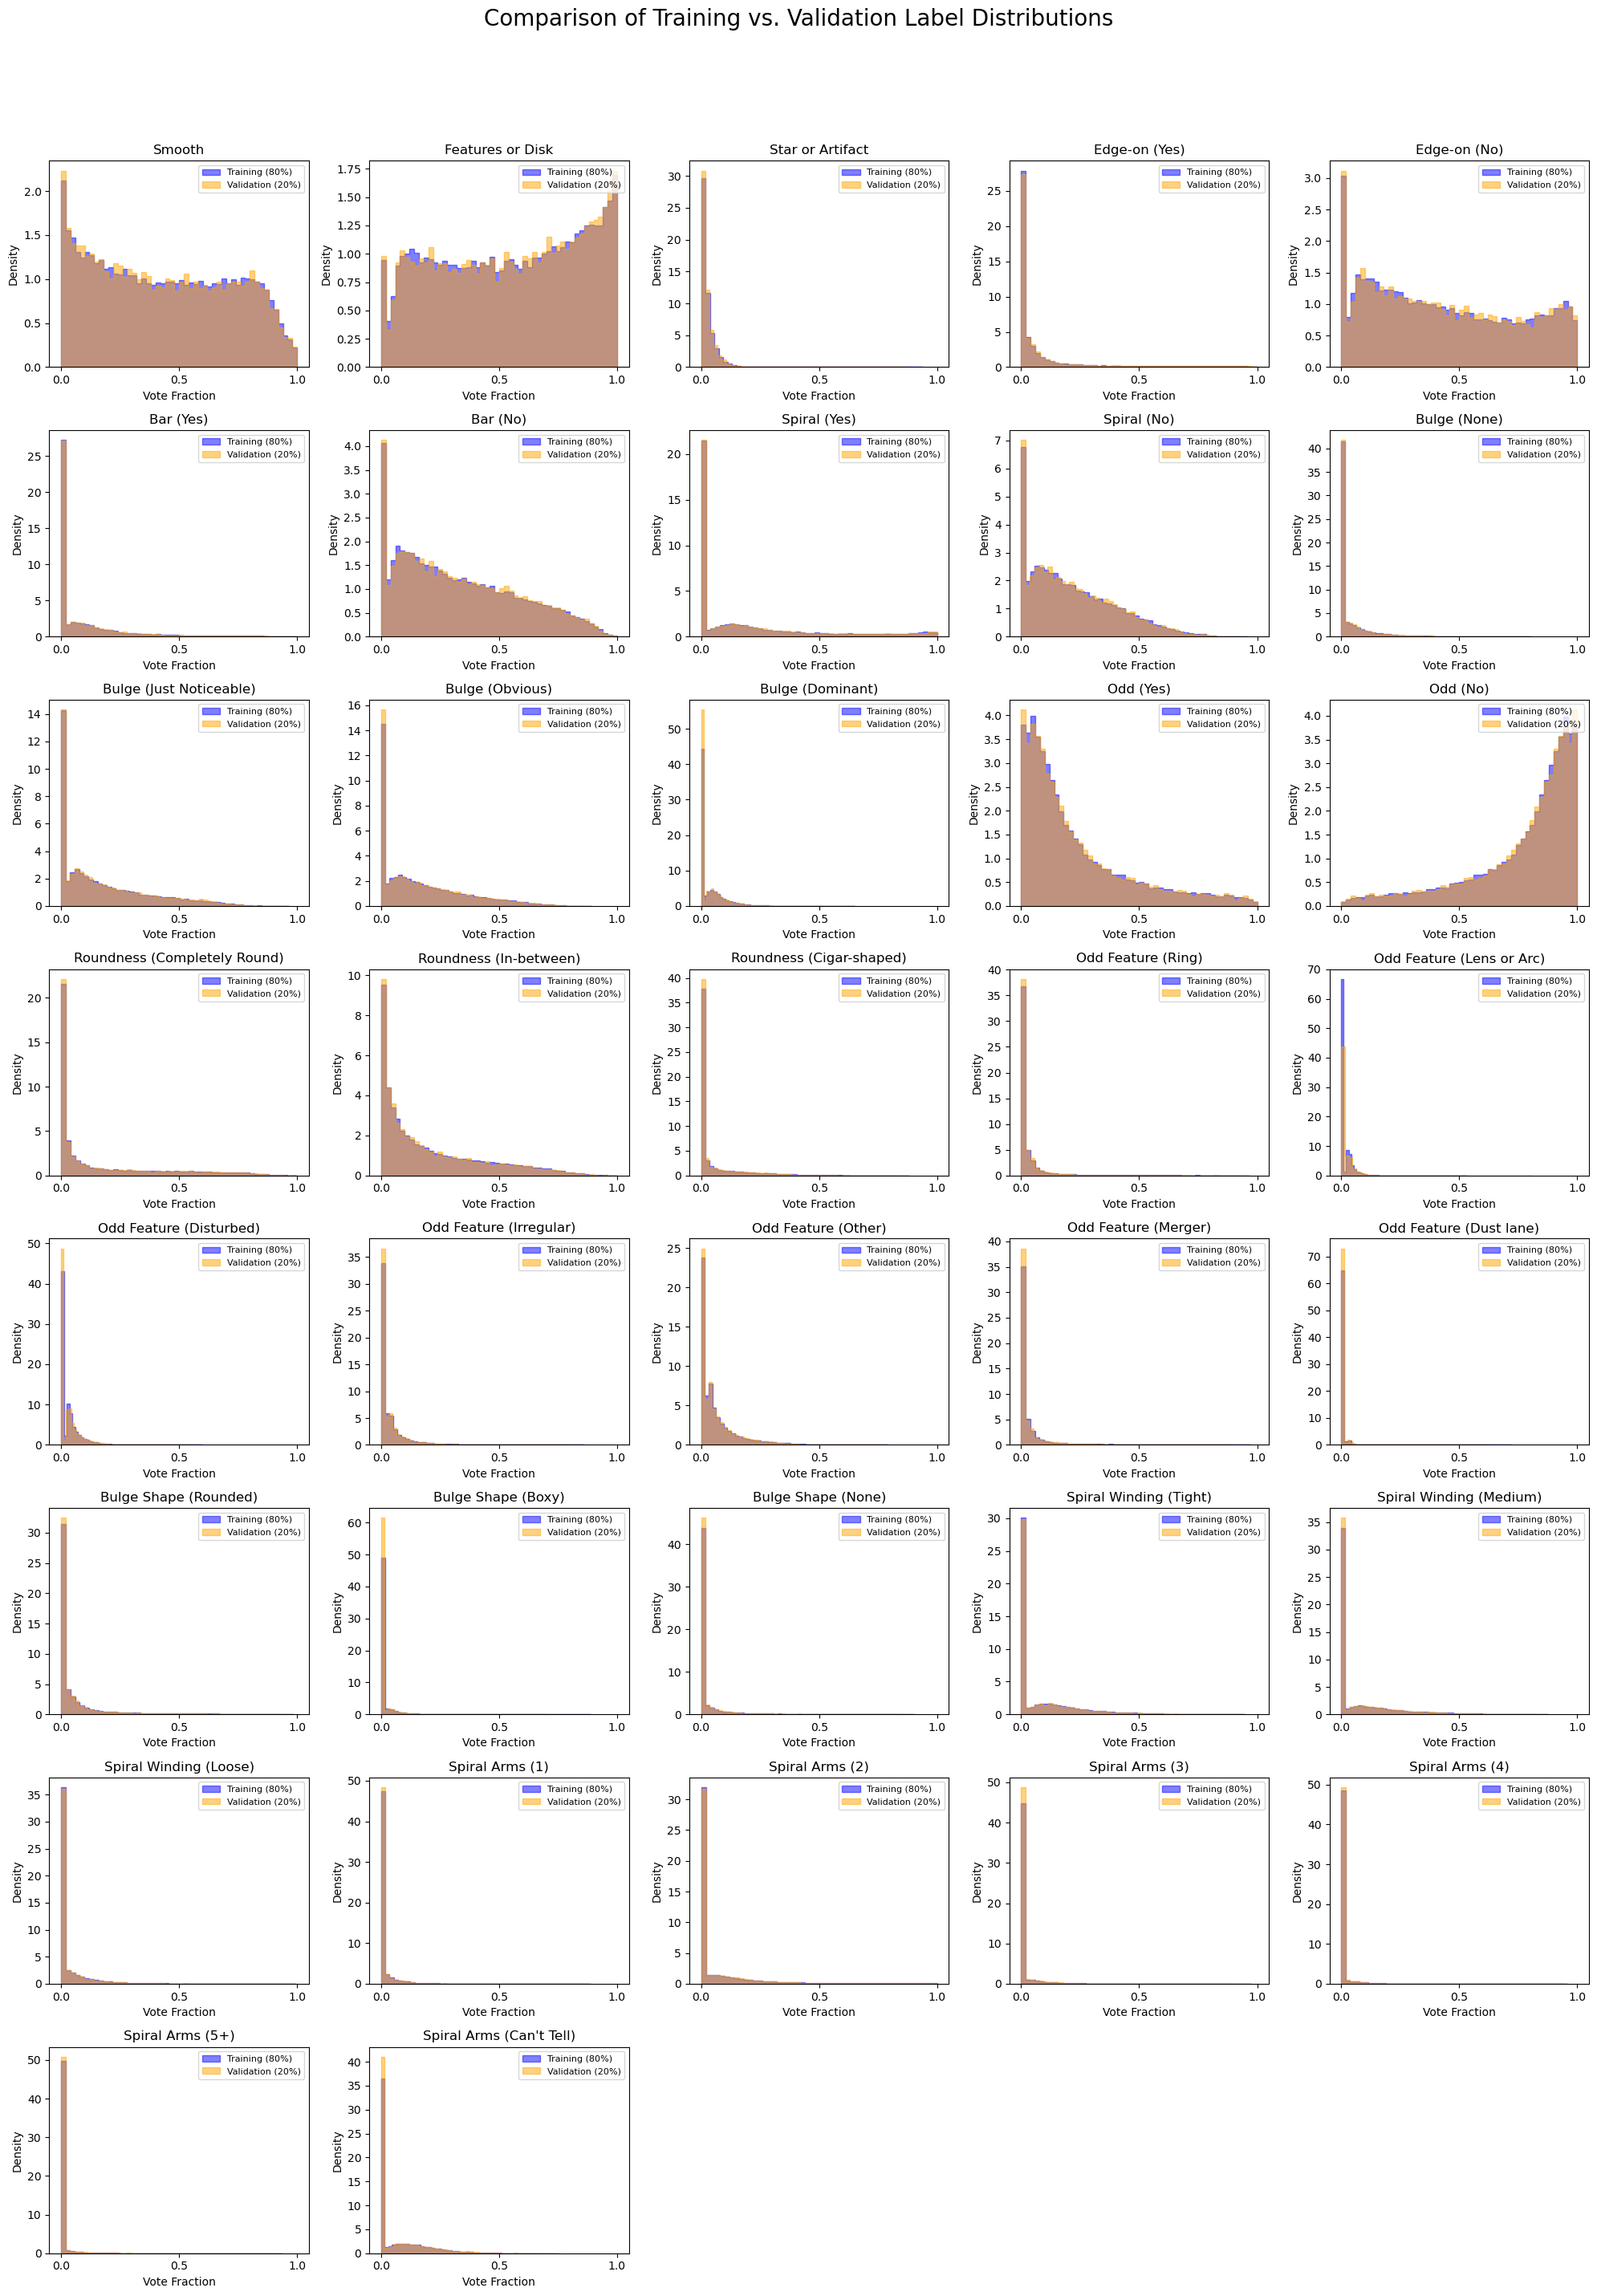

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import os


data = pd.read_csv("training_classifications.csv")
print(f"Successfully loaded {len(data)} objects from the CSV.")

label_columns = [col for col in data.columns if col.startswith('Class')]

#  Split the Data into Training (80%) and Validation (20%) Sets 
all_indices = data.index
train_indices, val_indices = train_test_split(
    all_indices,
    test_size=0.2,      # 20% for validation
    random_state=42,    
    shuffle=True        
)

train_df = data.loc[train_indices]
val_df = data.loc[val_indices]

print(f"\nTraining set size: {len(train_df)} objects (80%)")
print(f"Validation set size: {len(val_df)} objects (20%)")

# Compare Normalized Distributions 

N_COLS = 5
N_ROWS = int(np.ceil(len(label_columns) / N_COLS))

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(20, N_ROWS * 3.5))
fig.suptitle('Comparison of Training vs. Validation Label Distributions', fontsize=20, y=1.02)
axes = axes.flatten()

for i, col_name in enumerate(label_columns):
    ax = axes[i]
    title = COLUMN_MAPPING.get(col_name, col_name)

    # Plot Training Distribution (Blue)
    ax.hist(
        train_df[col_name],
        bins=50, density=True, histtype='stepfilled', alpha=0.5,
        label='Training (80%)', edgecolor='blue', color='blue'
    )
    
    # Plot Validation Distribution (Orange)
    ax.hist(
        val_df[col_name],
        bins=50, density=True, histtype='stepfilled', alpha=0.5,
        label='Validation (20%)', edgecolor='orange', color='orange'
    )

    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Vote Fraction', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_xlim(-0.05, 1.05)
    ax.set_xticks([0, 0.5, 1])
    ax.legend(fontsize=8, loc='upper right')

# Hide any unused axes
for j in range(len(label_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('task_split_comparison.png', bbox_inches='tight')
plt.show() 

# Task 13 

In [65]:
# Identify the training label matrix
train_labels = train_df[label_columns].values
val_labels = val_df[label_columns].values

# Calculate the predicted labels (Mean of each column in the training set)

train_label_means = train_labels.mean(axis=0)

# The prediction for ALL galaxies is this mean vector:
# pred_train = train_label_means 
# pred_val = train_label_means 


# --- L_RMSE for Training Set ---
N_labels = len(label_columns)
N_train = len(train_df)
overall_N_train = N_train * N_labels

# Calculate the squared error matrix: (True_label - Predicted_label)^2
squared_error_train = (train_labels - train_label_means)**2

# Sum all squared errors, divide by the total count, and take the square root
L_RMSE_train = np.sqrt(squared_error_train.sum() / overall_N_train)


# --- L_RMSE for Validation Set ---
N_val = len(val_df)
overall_N_val = N_val * N_labels

# Calculate the squared error for the validation set using the TRAIN MEANS
squared_error_val = (val_labels - train_label_means)**2

# Sum all squared errors, divide by the total count, and take the square root
L_RMSE_val = np.sqrt(squared_error_val.sum() / overall_N_val)


print(f"Benchmark Model L_RMSE (Training Set): {L_RMSE_train:.4f}")
print(f"Benchmark Model L_RMSE (Validation Set): {L_RMSE_val:.4f}")

Benchmark Model L_RMSE (Training Set): 0.1638
Benchmark Model L_RMSE (Validation Set): 0.1641


# Task 14

## Task 15 

In [66]:
# --- Configuration ---
#
N_LABELS = 37 # Based on the size of the label_columns from previous tasks
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# --- Model Customization ---
def create_custom_resnet18(num_classes):
    # 1. Load the pre-trained ResNet-18 model 
    model = models.resnet18(weights=None) # weights=None loads the structure, not weights

    # 2. Modify the first convolutional layer for smaller 64x64 input
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    
    # Also remove the maxpool layer (often skipped for 64x64)
    model.maxpool = nn.Identity()

    # 3. Modify the final fully connected layer (the classifier)
   
    num_ftrs = model.fc.in_features
    
    model.fc = nn.Linear(num_ftrs, num_classes)
    
    # 4. Wrap the model to include the Sigmoid activation
    class GalaxyResNet(nn.Module):
        def __init__(self, resnet_model):
            super().__init__()
            self.resnet = resnet_model
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.resnet(x)
            # Apply Sigmoid to ensure outputs are between 0 and 1 (vote fractions)
            x = self.sigmoid(x)
            return x

    return GalaxyResNet(model)

# Instantiate the model
model = create_custom_resnet18(N_LABELS).to(DEVICE)
print(f"Model successfully loaded and customized for {N_LABELS} outputs on {DEVICE}.")

# --- Loss Function and Optimizer ---
# The loss function is the L_RMSE. We use MSELoss, and take the sqrt later.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Example learning rate

# --- Training History Tracking ---
history = {
    'train_loss': [], 
    'val_loss': [], 
    'train_images_seen': []
}

Model successfully loaded and customized for 37 outputs on cpu.


Starting training...


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/3, Batch 100, L_RMSE: 0.1393
Epoch 1/3, Batch 200, L_RMSE: 0.1150
Epoch 1/3, Batch 300, L_RMSE: 0.1139
--- Epoch 1: Train L_RMSE: 0.1282 | Val L_RMSE: 0.1142 ---
Model saved! Validation loss improved.
Epoch 2/3, Batch 100, L_RMSE: 0.1073
Epoch 2/3, Batch 200, L_RMSE: 0.1054
Epoch 2/3, Batch 300, L_RMSE: 0.0984
--- Epoch 2: Train L_RMSE: 0.1069 | Val L_RMSE: 0.1212 ---
Epoch 3/3, Batch 100, L_RMSE: 0.1003
Epoch 3/3, Batch 200, L_RMSE: 0.1090
Epoch 3/3, Batch 300, L_RMSE: 0.0962
--- Epoch 3: Train L_RMSE: 0.1016 | Val L_RMSE: 0.1060 ---
Model saved! Validation loss improved.
Training finished.


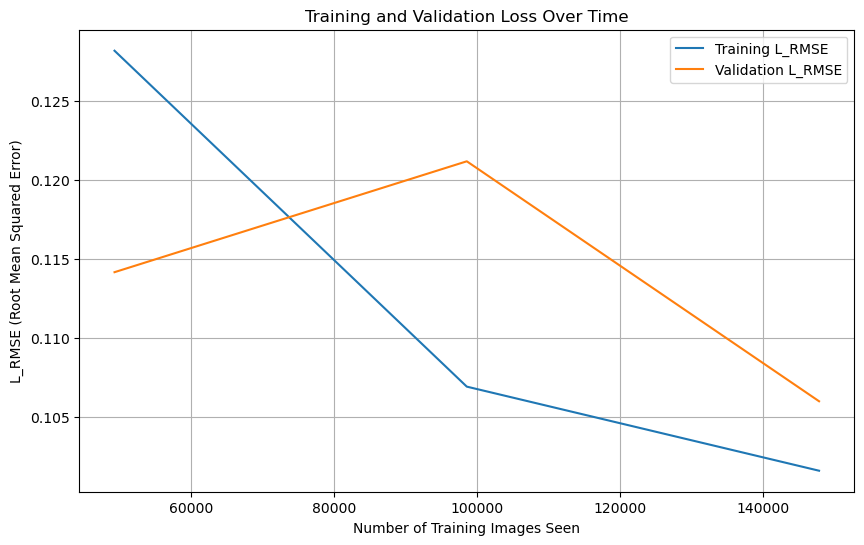

In [67]:
# --- Training Loop Setup ---
NUM_EPOCHS = 3  
best_val_loss = float('inf')
global_step_count = 0

print("Starting training...")

for epoch in range(NUM_EPOCHS):
    # --- TRAINING PHASE ---
    model.train() # Set model to training mode
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad() # Clear the gradients of all optimized tensors

        
        outputs = model(images) # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels) # Calculate the loss

        loss.backward() # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step() # Perform a single optimization step (parameter update)

        # Track metrics
        running_loss += loss.item() * images.size(0)
        global_step_count += images.size(0)

        # Optional: Log batch loss periodically
        if (i + 1) % 100 == 0:
            current_loss = np.sqrt(loss.item()) # L_RMSE for this batch
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Batch {i+1}, L_RMSE: {current_loss:.4f}")

    # Calculate Epoch Training L_RMSE
    epoch_train_mse = running_loss / len(train_loader.dataset)
    epoch_train_l_rmse = np.sqrt(epoch_train_mse)
    
    history['train_loss'].append(epoch_train_l_rmse)
    history['train_images_seen'].append(global_step_count)


    # --- VALIDATION PHASE ---
    model.eval() # set outselves in evaluation mode
    val_loss = 0.0
    
    with torch.no_grad(): 
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

    # Calculate Epoch Validation L_RMSE
    epoch_val_mse = val_loss / len(val_loader.dataset)
    epoch_val_l_rmse = np.sqrt(epoch_val_mse)
    
    history['val_loss'].append(epoch_val_l_rmse)

    print(f"--- Epoch {epoch+1}: Train L_RMSE: {epoch_train_l_rmse:.4f} | Val L_RMSE: {epoch_val_l_rmse:.4f} ---")

    # --- SAVE NETWORK (Early Stopping Check) ---
    if epoch_val_l_rmse < best_val_loss:
        best_val_loss = epoch_val_l_rmse
        # Save the network and training history
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': best_val_loss,
            'history': history
        }, 'resnet18_best_model.pth')
        print("Model saved! Validation loss improved.")
    elif epoch > 2 and epoch_val_l_rmse > history['val_loss'][-2] and epoch_val_l_rmse > history['val_loss'][-3]:
        print("Validation loss increasing for two consecutive epochs. Stopping early.")
        break
        
print("Training finished.")


# --- Plot the training and validation loss ---
plt.figure(figsize=(10, 6))
# history['train_images_seen'] is N_images seen so far, which is what is requested
plt.plot(history['train_images_seen'], history['train_loss'], label='Training L_RMSE')
plt.plot(history['train_images_seen'], history['val_loss'], label='Validation L_RMSE')

plt.xlabel('Number of Training Images Seen')
plt.ylabel('L_RMSE (Root Mean Squared Error)')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
# plt.savefig('task15_loss_plot.png')
plt.show()